**IMPORTANT** <br> <ul> <li> Do **NOT** replace or remove this notebook (ipynb file)! Each cell has unique nbgrader's metadata and ID which, if changed outside the nbgrader, cannot pass the tests. Do **NOT** change the name of the file!</li> <li> To receive any credit, don't forget to **SUBMIT** your notebook when you are done! You can have multiple submissions before the deadline; only the last one is saved, including its timestamp.</li> <li>Before submitting, **Validate** your notebook to check if your codes pass all visible tests. </li> <li>Make sure you fill in any cell with the comment `# your code here`. Remove or comment the command `fail()` (in R), or `raise NotImplementedError` (in Python) and place your code there </li> </ul>

In [1]:
NAME = "Christian Olivares-Rodriguez"

---

# Logistic Regression in Python

In this part of the homework, we'll briefly train some logistic regression models in Python, using functions available through scikit-learn.

HW adopted partially from Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow by Aurelien Geron, and the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Run the following cell to import some of our basic libraries/objects, including inlucing the `LogisticRegression` model from `sklearn.linear_model`.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#confusion_matrix and accuracy_score may come in handy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Various helper functions
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Logistic Regression
from sklearn.linear_model import LogisticRegression

## Iris Data

Let's get the iris dataset: This dataset contains sepal and petal length and width for 150 iris flowers of species *Iris setosa*, *Iris versicolor*, and *Iris virginica*. Luckily, we can just load as follows:

In [25]:
from sklearn import datasets

iris = datasets.load_iris()

#We got?
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

<br>

Let's put this into a dataframe:


In [26]:
#Create initial DataFrame:
df = pd.DataFrame(np.concatenate((iris['data'], iris['target'].reshape(-1,1)), axis=1),
                  columns = list(iris['feature_names']) + ['species'])

df['species'] = df['species'].astype(int)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<br>

And add in the species names:

In [27]:
#Add species name for our reference
#####

df['name'] = [iris['target_names'][i] for i in df.species.astype(int)]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Train/Test Split

Now, let's use our four iris measurements, `sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm)` (in that order!), as input/predictors, and `species` (as an integer) as output.

Create the DataFrames `X` and Series `y` from our predictor and output variables, respectively.

Then split these into training and testing datasets using the `train_test_split` function, with **50%** of our data reserved for testing. **Use `random_state = 1234` for reproducibility.**

Name your resulting training/testing datasets `X_train`, `X_test`, `y_train`, and `y_test`.

In [28]:
# your code here

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] 
y = df['species'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1234)

In [29]:
## test whether the first 2 rows of X_train are correct:
c = np.array([[7.9, 3.8, 6.4, 2.0],
       [5.7, 4.4, 1.5, 0.4]])

assert np.isclose(X_train.iloc[:2,:].values, c).sum() == 8

## test whether the first 4 rows of y_train are correct:
assert np.isclose(y_train[:4].values, np.array([2, 0, 1, 1])).sum() == 4


c = np.array([[6.1, 3.0, 4.6, 1.4],
       [6.1, 2.9, 4.7, 1.4]])

## test whether the first 2 rows of X_test are correct:
assert np.isclose(X_test.iloc[:2,:].values, c).sum() == 8

## test whether the first 4 rows of y_test are correct:
assert np.isclose(y_test[:4].values, np.array([1, 1, 2, 0])).sum() == 4


## Single Predictor, Binary Output

Let's just use `petal width (cm)` to predict whether a flower is or is not species `Iris versicolor`.

Create new training and testing **DataFrames** `X_train_pw` and `X_test_pw`, and **Series** `y_train_versicolor` and `y_test_versicolor`, where the latter are `1` if a flower is of species *Iris versicolor*, and `0` otherwise.

In [30]:
# your code here

df['is_versicolor'] = df['name'].apply(lambda x: 1 if x == 'versicolor' else 0)

X_pw = df[['petal width (cm)']]

y_versicolor = df['is_versicolor']

X_train_pw, X_test_pw, y_train_versicolor, y_test_versicolor = train_test_split(X_pw, y_versicolor, test_size = 0.5, random_state = 1234)

In [31]:
## test whether the first 5 rows of X_train_pw are correct:
assert np.isclose(X_train_pw[:5].values.reshape(1,-1), np.array([2, .4, 1.5, 1.3, .4])).sum() == 5

## test whether the first 5 rows of y_train_setosa are correct:
assert np.isclose(y_train_versicolor[:5].values, np.array([0, 0, 1, 1, 0])).sum() == 5


## test whether the first 5 rows of X_test_pw are correct:
assert np.isclose(X_test_pw[:5].values.reshape(1,-1), np.array([1.4, 1.4, 1.8, .3, 1.4])).sum() == 5

## test whether the first 5 rows of y_test_setosa are correct:
assert np.isclose(y_test_versicolor[:5].values, np.array([1, 1, 0, 0, 1])).sum() == 5


## Make a Pipeline for Adding Polynomial Features, Rescaling

Construct a pipeline named `lr_model` using the `make_pipeline` function from Scikit-Learn that does the following in sequence:

1. `PolynomialFeatures()` of degree 3
2. Applies `StandardScaler()`
3. Perform `LogisticRegression()`

Then, *fit* `lr_model` the training data `X_train_pw` with target `y_train_versicolor`.

Note that the Scikit-Learn `LogisticRegression` class uses L2 regularization by default. Simply use the defaults with respect to regularization.

In [32]:
# your code here
lr_model = make_pipeline(PolynomialFeatures(degree = 3), StandardScaler(),LogisticRegression())

lr_model.fit(X_train_pw, y_train_versicolor)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [33]:
##Check whether steps for lr_model are correct

assert isinstance(lr_model.steps[0][1], PolynomialFeatures)

assert isinstance(lr_model.steps[1][1], StandardScaler)

assert isinstance(lr_model.steps[2][1], LogisticRegression)

## Make Predictions on Testing Data

Having fit the model/pipeline, make predictions on the testing data, `X_test_pw`. Assign your predictions to the variable `yhat_versicolor`.

In [34]:
# your code here
yhat_versicolor = lr_model.predict(X_test_pw)

In [35]:
## test whether the first 10 elements of yhat_versicolor are correct:
assert np.isclose(yhat_versicolor[:10], np.array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0])).sum() == 10



## Graphically Characterize Results

Reproduce (in essence) the following figure that visually depicts the testing observations along with the model-predicted probability that an instace belongs or does not belong to the Iris versicolor class, based on petal width.

<img src="versicolor_probs_1feature.png" alt="Versicolor results" style="width:800px;"/>


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability/Category')

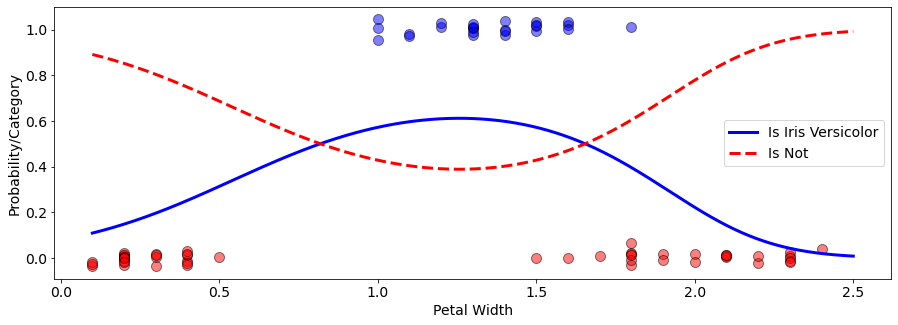

In [36]:
# your code here

x_display = np.linspace(X_test_pw.min(), X_test_pw.max(), 1000).reshape(-1, 1)

fig1, ax1 = plt.subplots(figsize = (15, 5))


jitter_strength = 0.02
ax1.scatter(X_train_pw[y_train_versicolor == 0],
            y_train_versicolor[y_train_versicolor == 0] + np.random.normal(scale = jitter_strength, size = y_train_versicolor[y_train_versicolor == 0].shape),
            color ='red', s = 100, alpha = 0.5, edgecolor = 'black')

ax1.scatter(X_train_pw[y_train == 1],
            y_train_versicolor[y_train_versicolor == 1] + np.random.normal(scale = jitter_strength, size = y_train_versicolor[y_train_versicolor == 1].shape),
            color = 'blue', s = 100, alpha = 0.5, edgecolor = 'black')


y_display_prob = lr_model.predict_proba(x_display)  

ax1.plot(x_display, y_display_prob[:, 1], '-b', linewidth = 3, label = 'Is Iris Versicolor')
ax1.plot(x_display, y_display_prob[:, 0], '--r', linewidth = 3, label = 'Is Not')

ax1.legend(fontsize = 14)
ax1.tick_params(axis = 'both', labelsize = 14)
ax1.set_xlabel('Petal Width', fontsize = 14)
ax1.set_ylabel('Probability/Category', fontsize = 14)

### Classifier Metrics

Using your predictions on the *test* data, report the following metrics assigned to the following variables:

1. `precision` = Precision (positive predictive value)
2. `recall` = Recall (sensitivity, true positive rate)
3. `F1` = F1 Score (Harmonic mean of recall and precision)
3. `acc` = Accuracy


In [37]:
# your code here
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred_versicolor = lr_model.predict(X_test_pw)

precision = precision_score(y_test_versicolor, y_pred_versicolor)
recall = recall_score(y_test_versicolor, y_pred_versicolor)
f1 = f1_score(y_test_versicolor, y_pred_versicolor)
acc = accuracy_score(y_test_versicolor, y_pred_versicolor)

In [38]:
## test whether the 2nd and 3rd decimal digits of precision are 23
assert np.mod(int(np.floor(precision * 10**3)), 100) == 23

## test whether the 2nd and 3rd decimal digits of recall are 60
assert np.mod(int(np.floor(recall * 10**3)), 100) == 60

## test whether the 2nd and 3rd decimal digits of f1 are 41
assert np.mod(int(np.floor(f1 * 10**3)), 100) == 41

## test whether the 2nd and 3rd decimal digits of acc are 60
assert np.mod(int(np.floor(acc * 10**3)), 100) == 60

In [39]:
## test whether precision, recall, f1, and acc are correct (hidden tests)


## Logistic Regression (i.e., Multinomial Regression) for All Species

Basic logistic regression cannot be used in a classification problem with more than 2 classes. However, we can create an ensemble of one-vs-rest logistic models for a multi-class problem.

We can also perform multinomial logistic regression (this is assured simply by setting the parameter `multi_class = "multinomial"` when we create the logistic regression model).

#### Re-fit and Predict

Re-fit the `lr_model` model using petal width as the only predictor, but with all three classes of Iris included in the output (target).

Predict the Iris class on the *testing* data (just petal width), and assign the result to `yhat_all`.

In [40]:
# your code here
lr_multinomial_model = make_pipeline(PolynomialFeatures(degree = 3),StandardScaler(),LogisticRegression(multi_class = 'multinomial'))

lr_multinomial_model.fit(X_train_pw, y_train) 

yhat_all = lr_multinomial_model.predict(X_test_pw) 

In [41]:
## test whether the first 10 elements of yhat_versicolor are correct:
assert np.isclose(yhat_all[:10], np.array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2])).sum() == 10


## Graphically Characterize Results for Multinomial Regression

Reproduce (in essence) the following figure that visually depicts the testing observations along with the model-predicted probability that an instace belongs to each possible class, based on petal width.

<img src="all_probs_1feature.png" alt="All species results" style="width:800px;"/>

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability/Category')

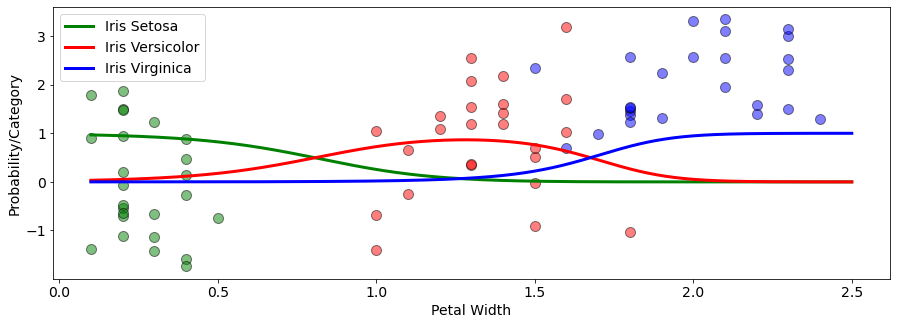

In [49]:
fig1, ax1 = plt.subplots(figsize = (15, 5))


jitter_strength = 1
ax1.scatter(X_train_pw[y_train == 0], 
            np.zeros_like(y_train[y_train == 0]) + np.random.normal(scale=jitter_strength, size=y_train[y_train == 0].shape),
            color='green', s=100, alpha=0.5, edgecolor='black')

ax1.scatter(X_train_pw[y_train == 1],
            np.ones_like(y_train[y_train == 1]) + np.random.normal(scale=jitter_strength, size=y_train[y_train == 1].shape),
            color='red', s=100, alpha=0.5, edgecolor='black')

ax1.scatter(X_train_pw[y_train == 2],
            np.ones_like(y_train[y_train == 2])*2 + np.random.normal(scale=jitter_strength, size=y_train[y_train == 2].shape),
            color='blue', s=100, alpha=0.5, edgecolor='black')


y_prob = lr_multinomial_model.predict_proba(x_display)

ax1.plot(x_display, y_prob[:, 0], '-g', linewidth = 3, label = 'Iris Setosa')
ax1.plot(x_display, y_prob[:, 1], '-r', linewidth = 3, label = 'Iris Versicolor')
ax1.plot(x_display, y_prob[:, 2], '-b', linewidth = 3, label = 'Iris Virginica')

        
ax1.legend(fontsize = 14)
ax1.tick_params(axis = 'both', labelsize = 14)
ax1.set_xlabel('Petal Width', fontsize = 14)
ax1.set_ylabel('Probability/Category', fontsize = 14)


## Multinomial Regression with Two Features

Finally, perform multinomial logistic regression to classify flowers as either Iris Setosa, Iris Versicolor, or Iris Verginica, using only **sepal length and sepal width** as your predictors.

Train the model using the training data, and then make predictions on (what else) the test data.

Save the predictions as variable `yhat`.

Report the overall accuracy of the model (on the test data) as `acc`.

Note that the accuracy of this model will be appreciable less than the model above that used only a single feature. That's because we are using two rather poor predictors, sepal length and sepal width.

In [20]:
# your code here
X_sl_sw = df[['sepal length (cm)', 'sepal width (cm)']]

X_train_sl_sw, X_test_sl_sw, y_train, y_test = train_test_split(X_sl_sw, y, test_size = 0.5, random_state = 1234)

lr_model_sl_sw = make_pipeline(PolynomialFeatures(degree = 3),StandardScaler(),LogisticRegression(multi_class = 'multinomial'))

lr_model_sl_sw.fit(X_train_sl_sw, y_train)

yhat = lr_model_sl_sw.predict(X_test_sl_sw)

acc = accuracy_score(y_test, yhat)

In [21]:
## test whether 2th and 3rd decimal digits of acc are 13
assert np.mod(int(np.floor(acc * 10**3)), 100) == 13

In [22]:
## test whether acc is correct (hidden tests)


## Decision Surface

Make two plots that plot the decision surface and either (1) the training data, or (2) the testing data. Your plots should resemble the following:

<img src="iris_decision_surface.png" alt="Decision Surface" style="width:800px;"/>

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'sepal width (cm)')

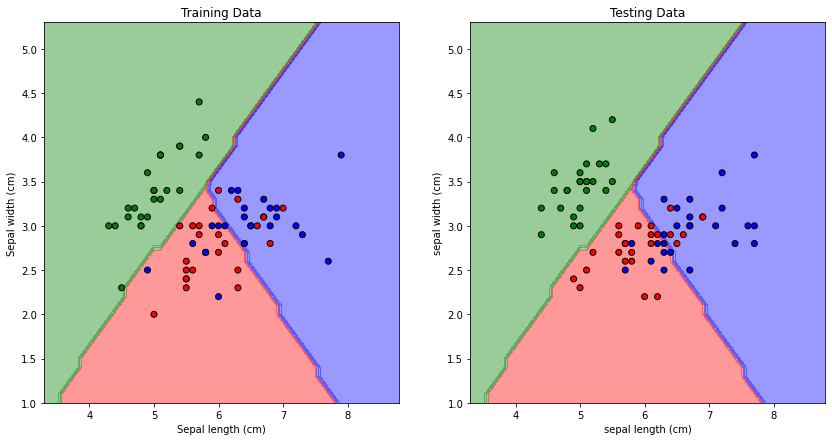

In [23]:
# your code here
from matplotlib.colors import ListedColormap
new_cmap = (ListedColormap(['green', 'red', 'blue']))

x_min, x_max = X_train_sl_sw.iloc[:, 0].min() - 1, X_train_sl_sw.iloc[:, 0].max() + 1
y_min, y_max = X_train_sl_sw.iloc[:, 1].min() - 1, X_train_sl_sw.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Training data plot
plt.figure(figsize = (14, 7))

plt.subplot(1, 2, 1)
Z = lr_model_sl_sw.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.4,
             cmap = ListedColormap(['green', 'red', 'blue']))
plt.scatter(X_train_sl_sw.iloc[:, 0],
            X_train_sl_sw.iloc[:, 1],
            c = y_train, edgecolors = 'k',
            cmap = ListedColormap(['green', 'red', 'blue']))
plt.title('Training Data')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')


# Testing data plot
plt.subplot(1, 2, 2)
Z = lr_model_sl_sw.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.4,
            cmap = ListedColormap(['green', 'red', 'blue']))
plt.scatter(X_test_sl_sw.iloc[:, 0],
            X_test_sl_sw.iloc[:, 1],
            c = y_test, edgecolors = 'k',
            cmap = ListedColormap(['green', 'red', 'blue']))
plt.title('Testing Data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
